In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
df=pd.read_csv('Loan_Pridiction_Training Dataset.csv')

In [37]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [38]:
df['Married']

0       No
1      Yes
2      Yes
3      Yes
4       No
      ... 
609     No
610    Yes
611    Yes
612    Yes
613     No
Name: Married, Length: 614, dtype: object

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [40]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Cleaning of dataset

In [41]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [42]:
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

In [43]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

In [44]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

In [45]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [46]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)

In [47]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [48]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: >

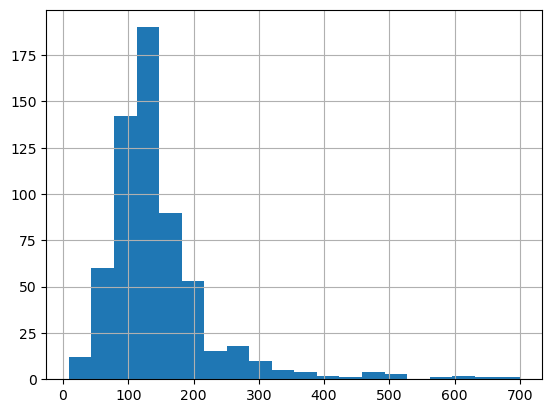

In [49]:
df['LoanAmount'].hist(bins=20)

In [50]:
df['LoanAmount_log']= np.log(df['LoanAmount'])

<Axes: >

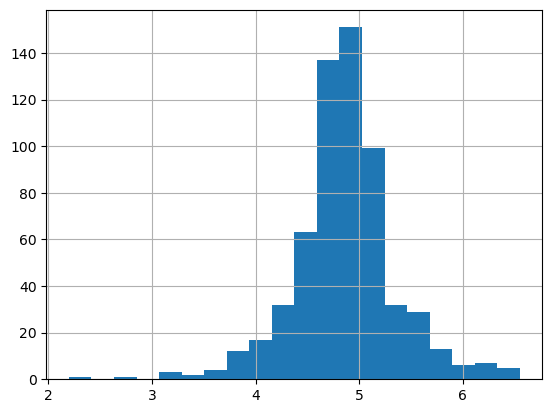

In [51]:
df['LoanAmount_log'].hist(bins=20)

<Axes: >

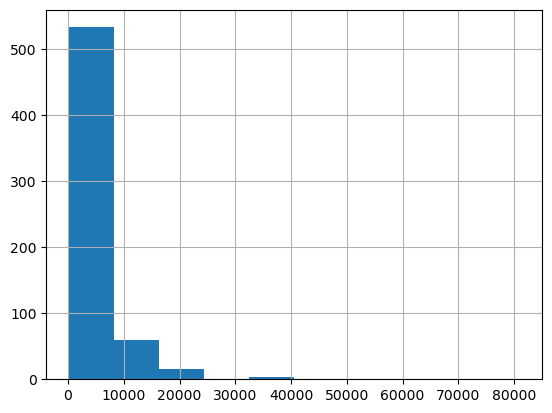

In [52]:
df['ApplicantIncome'].hist()

<Axes: >

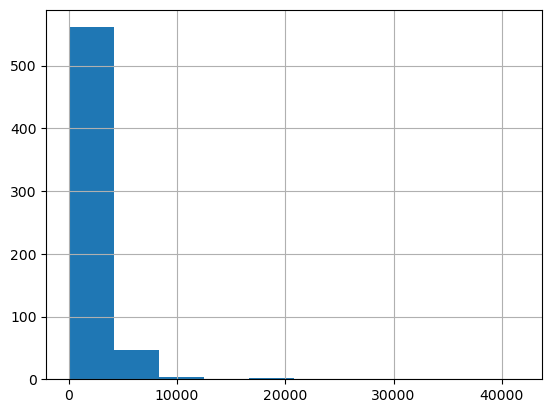

In [53]:
df['CoapplicantIncome'].hist()

In [54]:
df['TotalSalary']=df['ApplicantIncome']+df['CoapplicantIncome']

<Axes: >

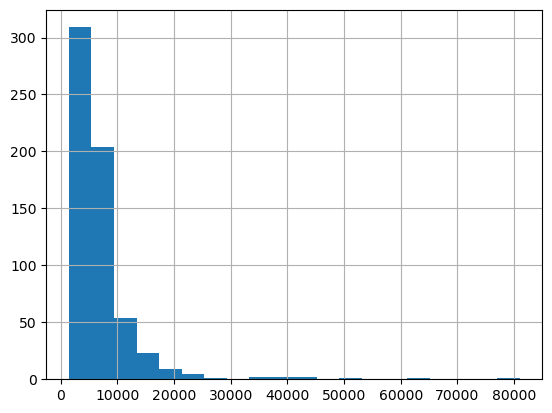

In [55]:
df['TotalSalary'].hist(bins=20)

In [56]:
df['TotalSalary_log']=np.log(df['TotalSalary'])

<Axes: >

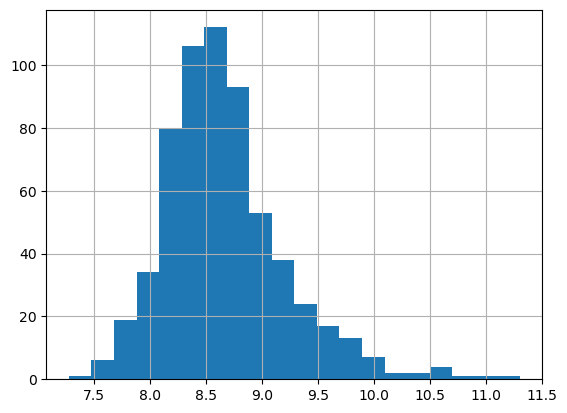

In [57]:
df['TotalSalary_log'].hist(bins=20)

In [58]:
df.head()

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object

In [59]:
df['Gender']=df['Gender'].replace({'Male':1,'Female':0})

In [62]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalSalary,TotalSalary_log
0,LP001002,1,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.986426,5849.0,8.674026
1,LP001003,1,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,1,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,1,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,1,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [64]:
df['Married']=df['Married'].replace({'Yes':1,'n':0})

In [66]:
df['Self_Employed']=df['Self_Employed'].replace({'Yes':1,'No':0})

In [95]:
df['Property_Area']=df['Property_Area'].replace({'Urban':1,'Rural':0,'Semiurban':1.5})

In [96]:
df['Loan_Status']=df['Loan_Status'].replace({'Y':1,'N':0})

In [97]:
df['Education']=df['Education'].replace({'Graduate':1,'Not Graduate':0})

In [98]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [99]:
df['Property_Area'].unique()

array([1. , 0. , 1.5])

In [100]:
df['Dependents']=df['Dependents'].replace({'3+':4})

In [102]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalSalary,TotalSalary_log
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1.0,1,4.986426,5849.0,8.674026
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0.0,0,4.852030,6091.0,8.714568
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1.0,1,4.189655,3000.0,8.006368
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1.0,1,4.787492,4941.0,8.505323
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1.0,1,4.948760,6000.0,8.699515


### Model training

In [109]:
x=df[['Gender','Married','Dependents','Education','Self_Employed','TotalSalary_log','LoanAmount_log','Loan_Amount_Term',
      'Credit_History','Property_Area','LoanAmount_log']]
y=df['Loan_Status']

In [105]:
x

,Gender,Married,Dependents,Education,Self_Employed,TotalSalary_log,LoanAmount_log,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,1,0,0,1,0,8.674026,4.986426,360.0,1.0,1.0,4.986426
1,1,1,1,1,0,8.714568,4.852030,360.0,1.0,0.0,4.852030
2,1,1,0,1,1,8.006368,4.189655,360.0,1.0,1.0,4.189655
3,1,1,0,0,0,8.505323,4.787492,360.0,1.0,1.0,4.787492
4,1,0,0,1,0,8.699515,4.948760,360.0,1.0,1.0,4.948760
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,7.972466,4.262680,360.0,1.0,0.0,4.262680
610,1,1,4,1,0,8.320205,3.688879,180.0,1.0,0.0,3.688879
611,1,1,1,1,0,9.025456,5.533389,360.0,1.0,1.0,5.533389
612,1,1,2,1,0,8.933664,5.231109,360.0,1.0,1.0,5.231109


In [110]:
from sklearn.model_selection import train_test_split

In [120]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [125]:
from sklearn.preprocessing import StandardScaler

In [126]:
scale= StandardScaler()
x_trian=scale.fit_transform(x_train)

In [127]:
x_train

,Gender,Married,Dependents,Education,Self_Employed,TotalSalary_log,LoanAmount_log,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
90,1,1,0,1,0,8.675564,4.875197,360.0,1.0,1.5,4.875197
533,1,0,1,1,0,9.328123,5.278115,360.0,1.0,1.5,5.278115
452,1,1,0,1,0,8.644883,5.003946,360.0,0.0,0.0,5.003946
355,0,0,0,1,0,8.246172,4.753590,180.0,1.0,1.0,4.753590
266,1,1,2,1,0,8.715224,5.010635,360.0,1.0,1.5,5.010635
...,...,...,...,...,...,...,...,...,...,...,...
277,1,1,0,1,0,8.390041,4.382027,360.0,1.0,1.0,4.382027
9,1,1,1,1,0,10.077819,5.855072,360.0,1.0,1.5,5.855072
359,1,1,4,1,0,9.028099,5.298317,360.0,1.0,1.5,5.298317
192,1,1,0,0,0,8.705000,5.075174,360.0,1.0,1.0,5.075174


### Applying Decision tree classification algoritm

In [132]:
from sklearn.tree import DecisionTreeClassifier

In [135]:
Dtclassifier= DecisionTreeClassifier(criterion ='entropy',random_state=0)

In [137]:
Dtclassifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [138]:
y_pred=Dtclassifier.predict(x_test)

In [139]:
y_pred

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1], dtype=int64)

### Checking the Acuracy

In [142]:
from sklearn import metrics

In [144]:
print("Acuracy=",metrics.accuracy_score(y_pred,y_test))

Acuracy= 0.6747967479674797


### Now By Naiv Basyan algorithm

In [148]:
from sklearn.naive_bayes import GaussianNB

In [154]:
Guss=GaussianNB()
Guss.fit(x_train,y_train)
y_pred1=Guss.predict(x_test)

In [155]:
print("Acurracy of Naive_bayes = ",metrics.accuracy_score(y_pred1,y_test))

Acurracy of Naive_bayes =  0.8292682926829268
